# Prediction Heart Disease Using Machine Learning 

This notebook showcases an end to end machine learning framework using data on heart disease from the University of California Irvine. 

## Problem definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not a person has a heart disease?


## Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease in the proof of concept. We will pursue the project.

### Preparing tools

> Numpy

> Pandas

> Matplotlib

> Seaborn

> Scikit Learn

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Exploring our Data

In [2]:
# Reading our data
data = pd.read_csv("heart-disease.csv")
data.shape

(303, 14)

#### Data exploration

1. What questions are we trying to solve?
2. What kind of data do we have 
3. What's missing from the dara and how do we deal with it?
4. Where are the outliers and why should you care about them 
5. How can you add, change, or remove features to get more out of your data

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

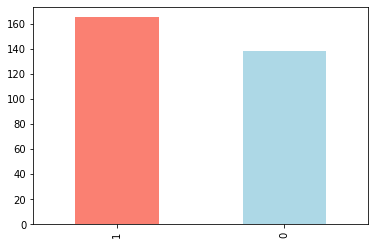

In [5]:
img = data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);
plt.savefig('Target Count.png')

In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there missing values?
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Finding Patterns

##### Heart disease frequencey accoding to sex

In [9]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column

pd.crosstab(data['target'], data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


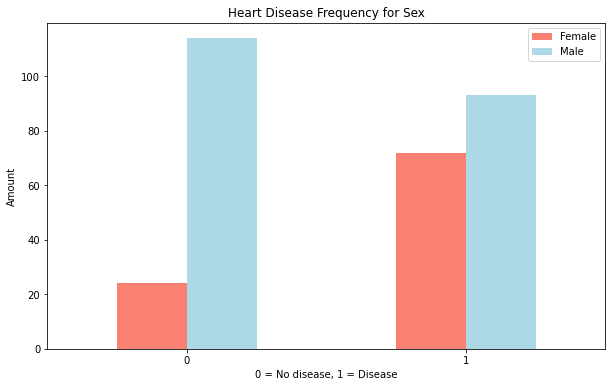

In [11]:
# create a plot of crosstab
pd.crosstab(data['target'], data['sex']).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.legend(['Female', 'Male'])
plt.ylabel('Amount')
plt.xticks(rotation=0);
plt.savefig('Heart Disease Frequency for Sex.png')

In [12]:
data['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

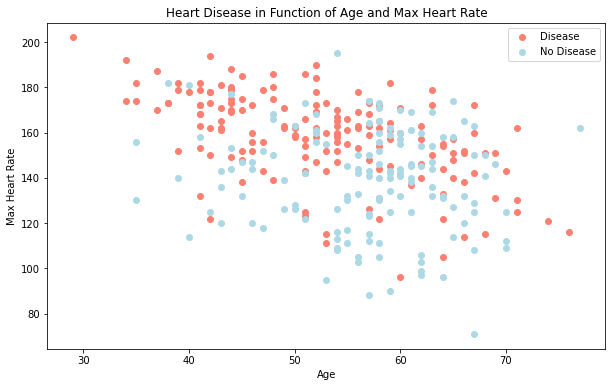

In [13]:
# Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10, 6))

#scatter with positive example (has heart disease)
plt.scatter(
    data.age[data.target == 1],
    data.thalach[data.target==1],
    c='salmon'
);

#scatter with negative example (has no heart disease)
plt.scatter(
    data.age[data.target == 0],
    data.thalach[data.target == 0],
    c='lightblue'
);

# add some helpful info
plt.title('Heart Disease in Function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);
plt.savefig('Heart Disease in Function of Age and Max Heart Rate.png')

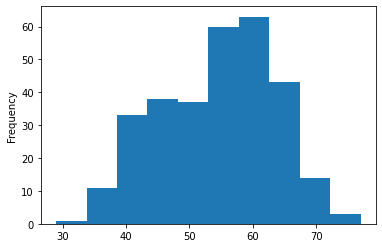

In [15]:
# Check distribution of the age column
# Checks for outliers
data.age.plot.hist();
plt.savefig('Age Frequency Table')

# No outliers so far...

In [67]:
# Heart Disease Frequence per Chest Pain Type
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


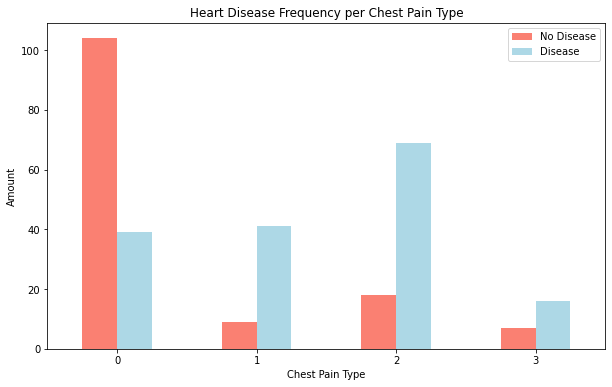

In [16]:
pd.crosstab(data.cp, data.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);
plt.savefig('Heart Disease Frequency per Chest Pain Type.png')

In [69]:
# Make correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


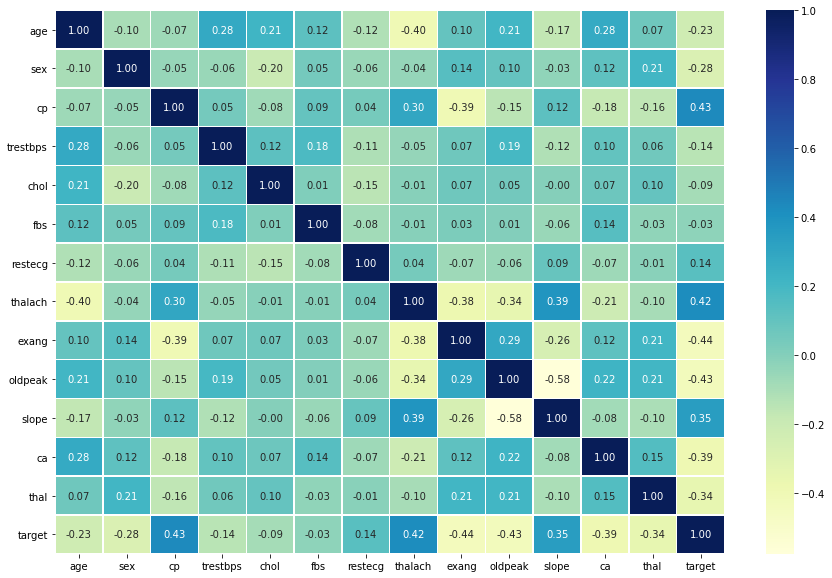

In [17]:
# Visualize correlation matrix
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt='.2f',
    cmap='YlGnBu'
);

plt.savefig('Correlation Matrix.png')

### Preparing our Data for Machine Learning

In [23]:
x = data.drop('target', axis=1)
y = data['target']

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Choosing the Right Models

We'll try three different models

1. Logistics Regression 

2. K-Nearest Neighbours Classifier 

3. Random Forest Classifier 

In [24]:
# put models in dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given Machine Learning Models.
    """
    np.random.seed(42)
    #Make a dictionary to store model scores
    model_scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        #evaluate the model, and append to model)scores
        model_scores[name] = model.score(x_test, y_test)

    return model_scores

In [20]:
model_scores = fit_and_score(
    models = models, 
    x_train=x_train, 
    x_test=x_test,
    y_test=y_test,
    y_train=y_train
    )

model_scores

NameError: name 'x_train' is not defined

## Model Comparison

In [19]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

NameError: name 'model_scores' is not defined

### Logistic Regression Performs Best

## Tuning and Improving our Models


Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix 
* Cross-validation 
* Precision 
* Recall 
* F1 score 
* Classification report
* ROC Curve 
* Area under the curve (AUC)

### Hyperparameter tuning - by hand

In [75]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neightbours
neighbors = range(1, 21)

knn = KNeighborsClassifier()

#loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))



Maximum KNN score on the test data: 75.41%


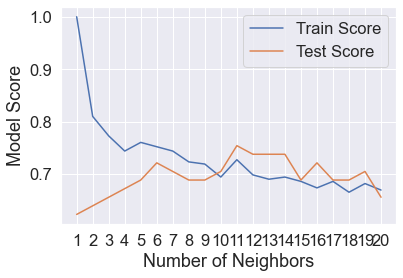

In [76]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
#change x values in graph to numbers from 1 to 21 exclusive
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Tuning with RandomizedSearchCV

In [77]:
# Create hyperparameter grid for logistic regresion - documentation reading

#keys are parameters of model
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
}

# Create hyperparameter grid for random forrest - documentation reading
rf_grid = {
    'n_estimators': np.arange(10, 100, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}



We've got hyperparameters grids setup for our models

In [78]:
#Tune logistic regression
np.random.seed(42)

#setup hyperparameter search
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20, #20 different combinations
    verbose=True
)

#fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [79]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [80]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [81]:
#Tuning random forrest
np.random.seed(42)

#setup random hyperparameter search for randomforeest classifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_grid,
    cv=5,
    n_iter=20,
    verbose=True,
)

rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [82]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [83]:
# Evaluate random forrest
rs_rf.score(x_test, y_test)

0.819672131147541

### Hyperparameter Tuning with GridSearchCv

In [84]:
# Logistic Regression GridSearchCv
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear'],
}

#setup grid hyperparameter search
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True,
)

gs_log_reg.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [85]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [86]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## Evaluating Logistic Regression Model

* ROC Curve & AUC Score
* Confusion Matrix
* Classification Report 
* Precision 
* Recall 
* F1-score 

In [87]:
# Make predictions first with tuned model

y_preds = gs_log_reg.predict(x_test)

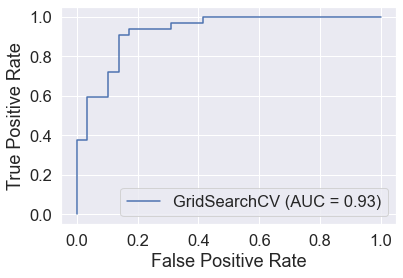

In [88]:
#ROC Curve and AUC Score
#Plot ROC Curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);


In [89]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


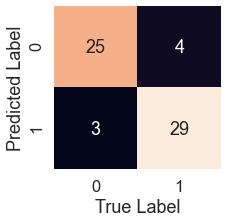

In [90]:
sns.set(font_scale=1.5)

def plot_confusion_mat(y_test, y_preds):
    '''
    Plots a Confusion Matrix using Heatmap
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(
        confusion_matrix(y_test, y_preds),
        annot=True,
        cbar=False,
    )

    plt.xlabel("True Label")
    plt.ylabel('Predicted Label')

    
plot_confusion_mat(y_test, y_preds)

Now we've got a ROC Curve, AUC Metric, and Confusion Matrix. Now lets
go get a classification report, as well as cross-validated precision, recall, and f1-score

In [91]:
print(classification_report(y_test, y_preds))
# Not really accurate: Only calculates with one split

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [92]:
# Calculate evaluation metrics using cross validation

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
#Create new cclassifier with best params
clf = LogisticRegression(
    C=0.20433597178569418,
    solver='liblinear'
)



In [94]:
# Corss Validated Accuracy

cv_acc = cross_val_score(
    clf,
    x,
    y,
    cv=5,
    scoring='accuracy'
)

cv_acc = np.mean(cv_acc)

In [95]:
# Cross validated precision
cv_precision = cross_val_score(
    clf,
    x,
    y,
    cv=5,
    scoring='precision'
) 

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [96]:
# Cross validated recall
cv_recall = cross_val_score(
    clf,
    x,
    y,
    cv=5,
    scoring='recall'
)

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [97]:
# Cross validated f1

cv_f1 = cross_val_score(
    clf,
    x,
    y,
    cv=5,
    scoring='f1'
)

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

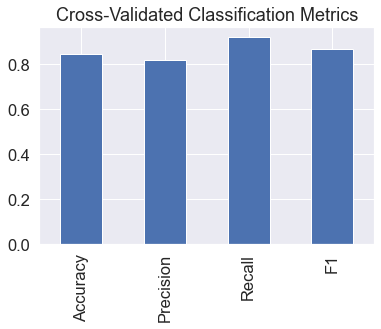

In [98]:
# Visualize cross validated metrics

cv_metrics = pd.DataFrame(
    [[cv_acc, cv_precision, cv_recall, cv_f1]], 
    columns=['Accuracy', 'Precision', 'Recall', 'F1'])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False);

 ### Feature Importance

Another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model

google -> "(Model Name) Feature importance"

  

In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [100]:
clf = LogisticRegression(
    C=0.20433597178569418,
    solver='liblinear'
)

clf.fit(x_train, y_train);

In [101]:
# Check coef_ -> gives coefficient of how variables contribute to the target
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [103]:
# match coeff of features to columns
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

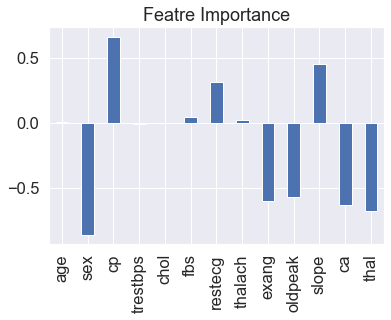

In [105]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Featre Importance', legend=False);

In [107]:
 # Use to figure out what is going on
 pd.crosstab(data['sex'], data['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [108]:
pd.crosstab(data['slope'], data['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

If you haven't hit your evaluation metric yet.......
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (Beyond what you've done so far)

In [ ]:
## Exporting a model
import pickle 

#Save model
pickle.dump(clf, open('final_model.pkl', 'wb'))

#load model
model = pickle.load(open('final_model.pkl', 'rb'))

#make prediction with model
